**NAMA: ASYFA NABILLA RAHMI <br>
NIM: 211351033 <br>
KELAS: PAGI A <br>**

#IMPORT DATASET KAGGLE

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asyfanabilla","key":"b1bc6b280d5b450963cadd8a53557d8c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mohamedharris/supermart-grocery-sales-retail-analytics-dataset

  0% 0.00/191k [00:00<?, ?B/s]
100% 191k/191k [00:00<00:00, 18.6MB/s]


In [4]:
!mkdir supermart-grocery-sales-retail-analytics-dataset
!unzip supermart-grocery-sales-retail-analytics-dataset.zip -d supermart-grocery-sales-retail-analytics-dataset
!ls supermart-grocery-sales-retail-analytics-dataset

Archive:  supermart-grocery-sales-retail-analytics-dataset.zip
  inflating: supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv  
'Supermart Grocery Sales - Retail Analytics Dataset.csv'


#IMPORT LIBRARY

In [5]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=cf7c9916720ec0648648b7b2c81a8e4bd1e40582521dc726560d5d0db8989674
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [6]:
pip install mlxtend

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from apyori import apriori
from mlxtend.frequent_patterns import association_rules, apriori
import networkx as nx
import re

#DATA DISCOVERY

In [49]:
 df = pd.read_csv("/content/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv")
 print("DataFrame shape:", df.shape)
 df.head()

DataFrame shape: (9994, 11)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [51]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', infer_datetime_format=True)
print(df['Order Date'])

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989          NaT
9990   2015-07-12
9991   2017-06-06
9992          NaT
9993          NaT
Name: Order Date, Length: 9994, dtype: datetime64[ns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
df["Order Date"].dtype
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object

In [11]:
df["month"] = df['Order Date'].dt.month
df["day"] = df['Order Date'].dt.weekday
df["year"] = df['Order Date'].dt.year

print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  month  day    year  
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu   11.0  2.0  2017.0  
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu   11.0  2.0  2017.0  
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu    6.0  0.0  2017.0  
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu   10.0  1.0  2016.0  
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu   10.0  1.0  2016.0  


In [12]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 9994
Number of columns: 14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(df.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID            0
Customer Name       0
Category            0
Sub Category        0
City                0
Order Date       5952
Region              0
Sales               0
Discount            0
Profit              0
State               0
month            5952
day              5952
year             5952
dtype: int64


In [14]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month,day,year
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu,NaN,NaN,NaN
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,7.0,6.0,2015.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6.0,1.0,2017.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu,NaN,NaN,NaN
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,NaT,West,1034,0.28,165.44,Tamil Nadu,NaN,NaN,NaN


In [15]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  month          4042 non-null   float64       
 12  day            4042 non-null   float64       
 13  year           4042 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 1.1+

In [16]:
df.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date        483
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
month              12
day                 7
year                4
dtype: int64

In [17]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sales,Discount,Profit,month,day,year
count,9994.000000,9994.000000,9994.000000,4042.000000,4042.000000,4042.000000
mean,1496.596158,0.226817,374.937082,8.022761,3.053934,2016.723404
std,577.559036,0.074636,239.932881,3.267876,2.192665,1.119750
min,500.000000,0.100000,25.250000,1.000000,0.000000,2015.000000
25%,1000.000000,0.160000,180.022500,5.000000,1.000000,2016.000000
50%,1498.000000,0.230000,320.780000,9.000000,3.000000,2017.000000
75%,1994.750000,0.290000,525.627500,11.000000,5.000000,2018.000000
max,2500.000000,0.350000,1120.950000,12.000000,6.000000,2018.000000


In [18]:
print(df[['Category','Sub Category','City']].value_counts().to_markdown())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


|                                                              |   0 |
|:-------------------------------------------------------------|----:|
| ('Beverages', 'Soft Drinks', 'Perambalur')                   |  44 |
| ('Beverages', 'Health Drinks', 'Ramanadhapuram')             |  40 |
| ('Beverages', 'Health Drinks', 'Chennai')                    |  39 |
| ('Beverages', 'Soft Drinks', 'Tirunelveli')                  |  38 |
| ('Beverages', 'Health Drinks', 'Ooty')                       |  38 |
| ('Beverages', 'Soft Drinks', 'Madurai')                      |  38 |
| ('Beverages', 'Health Drinks', 'Viluppuram')                 |  37 |
| ('Beverages', 'Health Drinks', 'Tenkasi')                    |  36 |
| ('Beverages', 'Health Drinks', 'Vellore')                    |  35 |
| ('Beverages', 'Health Drinks', 'Tirunelveli')                |  33 |
| ('Beverages', 'Health Drinks', 'Salem')                      |  33 |
| ('Beverages', 'Soft Drinks', 'Theni')                        |  33 |
| ('Be

In [19]:
freq=df[['Category','Sub Category','City']].value_counts().reset_index()
freq=freq.rename(columns={0: 'frequency'})
freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Sub Category,City,frequency
0,Beverages,Soft Drinks,Perambalur,44
1,Beverages,Health Drinks,Ramanadhapuram,40
2,Beverages,Health Drinks,Chennai,39
3,Beverages,Soft Drinks,Tirunelveli,38
4,Beverages,Health Drinks,Ooty,38
...,...,...,...,...
547,Food Grains,Atta & Flour,Trichy,7
548,Fruits & Veggies,Organic Vegetables,Ramanadhapuram,7
549,Fruits & Veggies,Fresh Fruits,Madurai,7
550,"Eggs, Meat & Fish",Fish,Viluppuram,5


In [20]:
cat_counts = df["Category"].value_counts()
cat_counts.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

In [21]:
excluded = list(cat_counts[cat_counts.values < 2].index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
transactions=[]
for action in df["Order ID"].unique():
    transaction=list(set(df[df["Order ID"]==action]['Category']))
    if not any(x in transaction for x in excluded):
        if len(transaction) != 1:
            transactions.append(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#EDA (Exploratory Data Analysis)

### Analisis sales by category and sub category

In [23]:
category_sales = df.groupby(['Category', 'Sub Category'])['Sales'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
fig = px.bar(category_sales, x='Category', y='Sales', color='Sub Category', title='Total Sales by Category')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
fig = px.pie(category_sales, values='Sales', names='Sub Category', title='Total Sales by Sub Category')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Analisis profit by category and sub category

In [26]:
category_profit = df.groupby(['Category', 'Sub Category'])['Profit'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
fig = px.bar(category_profit, x='Category', y='Profit', color='Sub Category', title='Total Profit by Category')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [28]:
fig = px.pie(category_profit, values='Profit', names='Sub Category', title='Total Profit by Sub Category')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Analisis sales and profit by region

In [29]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
sales_profit_by_region = pd.merge(sales_by_region, profit_by_region, on='Region')
sales_profit_by_region.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Region,Sales,Profit
0,Central,3468156,856806.84
1,East,4248368,1074345.58
2,North,1254,401.28
3,South,2440461,623562.89
4,West,4798743,1192004.61


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



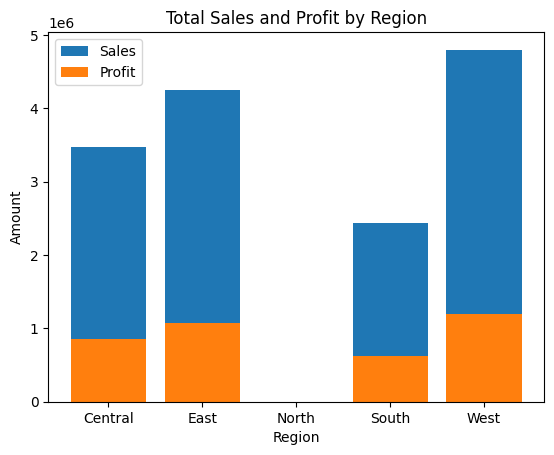

In [31]:
fig, ax = plt.subplots()
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Sales'], label='Sales')
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Profit'], label='Profit')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by Region')
ax.legend()
plt.show()

### Analisis monthly transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



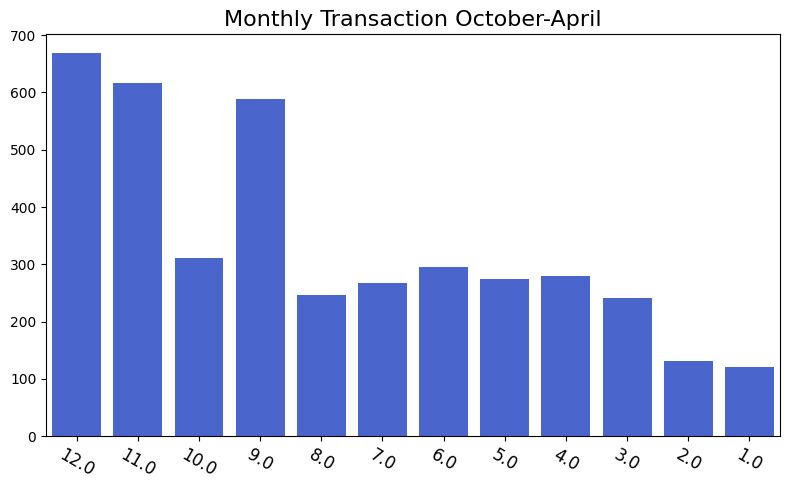

In [32]:
data_monthly = (
    df.groupby('month')['Order ID'].count()
    .sort_index(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=data_monthly.index.astype(str).to_list(),
            y=data_monthly.values,
            color="#3559E0")
plt.xticks(rotation=-30, size=12)
plt.title("Monthly Transaction October-April", size=16)
plt.tight_layout()
plt.show()

###Analisis daily transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



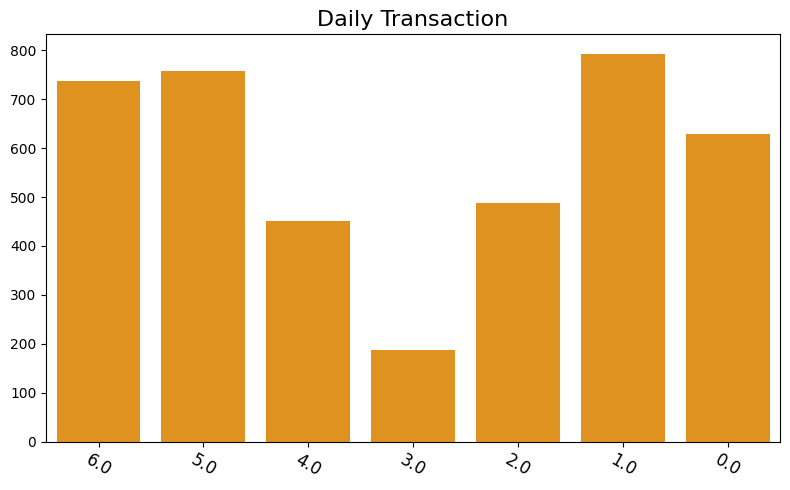

In [33]:
data_daily = (
    df.groupby('day')['Order ID'].count()
    .sort_index(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=data_daily.index.astype(str).to_list(),
            y=data_daily.values,
            color="#FF9800")
plt.xticks(rotation=-30, size=12)
plt.title("Daily Transaction", size=16)
plt.tight_layout()
plt.show()

#DATA PREPARATION

In [34]:
df["Category"] = df["Category"].apply(lambda items: items.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
df["Category"] = df["Category"].apply(lambda items: items.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [36]:
df = df[["Order ID", "Category"]].copy()
df.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Order ID,Category
0,OD1,oil & masala
1,OD2,beverages
2,OD3,food grains
3,OD4,fruits & veggies
4,OD5,food grains
5,OD6,food grains
6,OD7,fruits & veggies
7,OD8,fruits & veggies
8,OD9,bakery
9,OD10,bakery


In [37]:
cat_count = df.groupby(["Order ID", "Category"])["Category"].count().reset_index(name="Count")
cat_count.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Order ID,Category,Count
0,OD1,oil & masala,1
1,OD10,bakery,1
2,OD100,oil & masala,1
3,OD1000,bakery,1
4,OD1001,snacks,1
5,OD1002,beverages,1
6,OD1003,bakery,1
7,OD1004,snacks,1
8,OD1005,"eggs, meat & fish",1
9,OD1006,snacks,1


In [53]:
cat_count_pivot = pd.pivot_table(data=df, index=['Category', 'Sub Category'], values='Sales',
               aggfunc='sum').reset_index().sort_values(['Category', 'Sales'], ascending=False)
cat_count_pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Category,Sub Category,Sales
21,Snacks,Cookies,768213
22,Snacks,Noodles,735435
20,Snacks,Chocolates,733898
18,Oil & Masala,Masalas,697480
19,Oil & Masala,Spices,672876
17,Oil & Masala,Edible Oil & Ghee,668086
13,Fruits & Veggies,Fresh Fruits,551212
14,Fruits & Veggies,Fresh Vegetables,525842
16,Fruits & Veggies,Organic Vegetables,520271
15,Fruits & Veggies,Organic Fruits,503402


In [54]:
cat_count_pivot = cat_count.pivot_table(index='Order ID', columns='Category', values='Count', aggfunc='sum').fillna(0)
print("Dataset Size:", cat_count_pivot.shape)
cat_count_pivot.head()

Dataset Size: (9994, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Category,bakery,beverages,"eggs, meat & fish",food grains,fruits & veggies,oil & masala,snacks
Order ID,,,,,,,
OD1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
OD10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
OD100,0.0,0.0,0.0,0.0,0.0,1.0,0.0
OD1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
OD1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
cat_count_pivot = cat_count_pivot.astype("int32")
cat_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Category,bakery,beverages,"eggs, meat & fish",food grains,fruits & veggies,oil & masala,snacks
Order ID,,,,,,,
OD1,0,0,0,0,0,1,0
OD10,1,0,0,0,0,0,0
OD100,0,0,0,0,0,1,0
OD1000,1,0,0,0,0,0,0
OD1001,0,0,0,0,0,0,1


In [56]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 1:
    return 1

cat_count_pivot = cat_count_pivot.applymap(encode)
cat_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Category,bakery,beverages,"eggs, meat & fish",food grains,fruits & veggies,oil & masala,snacks
Order ID,,,,,,,
OD1,0,0,0,0,0,1,0
OD10,1,0,0,0,0,0,0
OD100,0,0,0,0,0,1,0
OD1000,1,0,0,0,0,0,0
OD1001,0,0,0,0,0,0,1


In [57]:
print("Dataset Size: ", cat_count_pivot.shape)
print("Total Transaksi: ", cat_count_pivot.shape[0])
print("Total Items: ", cat_count_pivot.shape[1])

Dataset Size:  (9994, 7)
Total Transaksi:  9994
Total Items:  7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#MODELING

In [83]:
support = 0.01
freq = apriori(cat_count_pivot, min_support = support, use_colnames = True)
freq.sort_values("support", ascending=False).head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
6,0.151491,(snacks)
2,0.149089,"(eggs, meat & fish)"
4,0.141885,(fruits & veggies)
0,0.141385,(bakery)
1,0.140084,(beverages)
3,0.139884,(food grains)
5,0.136182,(oil & masala)


In [86]:
metric = "lift"
min_threshold = 1

rules = association_rules(freq, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]

rules.sort_values('confidence', ascending=False, inplace=True)

rules.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,support,confidence,lift
0,(Health),(Drinks),0.142857,1.0,3.5
3,(Soft),(Drinks),0.142857,1.0,3.5
4,(Breads),(&),0.142857,1.0,7.0
5,(&),(Breads),0.142857,1.0,7.0
6,(Breads),(Buns),0.142857,1.0,7.0
7,(Buns),(Breads),0.142857,1.0,7.0
8,(Buns),(&),0.142857,1.0,7.0
9,(&),(Buns),0.142857,1.0,7.0
10,"(Breads, Buns)",(&),0.142857,1.0,7.0
11,"(Breads, &)",(Buns),0.142857,1.0,7.0


In [85]:
data = {
    'Customer Name' : ["Harish", "Sudha", "Hussain", "Jackson", "Ridhesh", "Sudeep", "Alan"],
    'Sub Category': ["Health Drinks", "Soft Drinks", "Cookies", "Breads & Buns", "Noodles", "Chocolates", "Masalas"],
    'Region' : ["West", "South", "East", "North", "Central", "", ""],
    'day' : ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

}
df = pd.DataFrame(data)

df['Sub Category'] = df['Sub Category'].apply(lambda x: x.split(' '))

oht = df['Sub Category'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0)

freq = apriori(oht, min_support=0.01, use_colnames=True)

rules = association_rules(freq, metric="confidence", min_threshold=0.1)
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



       antecedents     consequents  antecedent support  consequent support  \
0         (Health)        (Drinks)            0.142857            0.285714   
1         (Drinks)        (Health)            0.285714            0.142857   
2         (Drinks)          (Soft)            0.285714            0.142857   
3           (Soft)        (Drinks)            0.142857            0.285714   
4         (Breads)             (&)            0.142857            0.142857   
5              (&)        (Breads)            0.142857            0.142857   
6         (Breads)          (Buns)            0.142857            0.142857   
7           (Buns)        (Breads)            0.142857            0.142857   
8           (Buns)             (&)            0.142857            0.142857   
9              (&)          (Buns)            0.142857            0.142857   
10  (Breads, Buns)             (&)            0.142857            0.142857   
11     (Breads, &)          (Buns)            0.142857          

#VISUALISASI HASIL MODELING

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



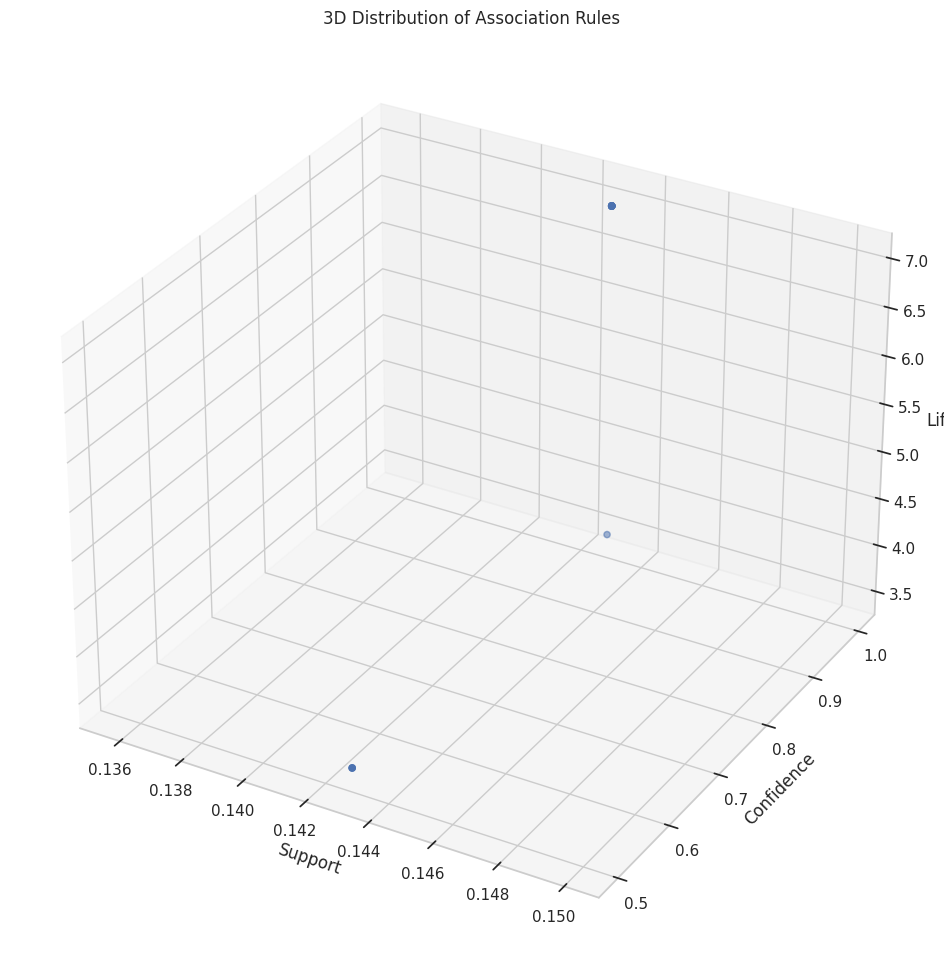

In [88]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:16: DeprecationWarning:

invalid escape sequence '\d'

<>:16: DeprecationWarning:

invalid escape sequence '\d'

<ipython-input-89-e805793676f9>:16: DeprecationWarning:

invalid escape sequence '\d'



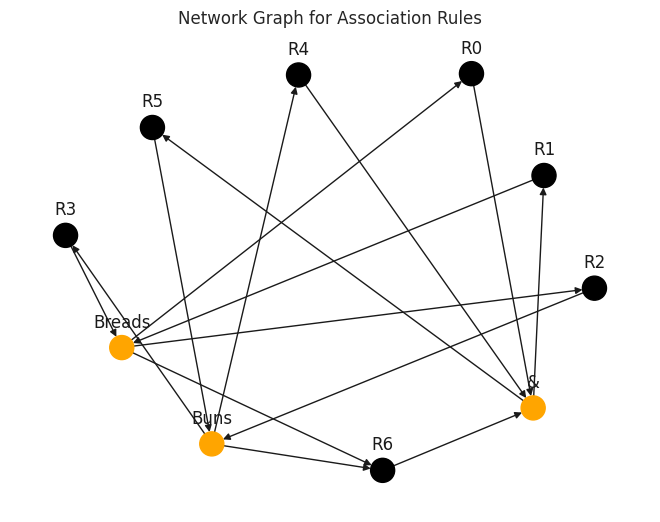

In [89]:
def draw_network(rules, rules_to_show):
    network = nx.DiGraph()
    for i in range(rules_to_show):
        network.add_nodes_from(["R" + str(i)])
        for antecedents in rules.iloc[i]['antecedents']:
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R" + str(i), weight=2)

        for consequents in rules.iloc[i]['consequents']:
            network.add_nodes_from([consequents])
            network.add_edge("R" + str(i), consequents, weight=2)

    color_map = []

    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node) is not None:
            color_map.append('black')
        else:
            color_map.append('orange')

    pos = nx.spring_layout(network, k=16, scale=1)

    nx.draw(network, pos, node_color=color_map, font_size=8)

    for p in pos:
        pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)

    plt.title("Network Graph for Association Rules")
    plt.show()

draw_network(rules, 7)
